<a href="https://colab.research.google.com/github/svhenrique/analise-dataset-heart-disease/blob/master/semana3/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Dados sobre mortalidade da insuficiênia cardíaca**


*   O dataset contém 12 recursos que podem ser usados para prever a morte por insuficiência cardíaca.
* [Heart Failure Prediction](https://www.kaggle.com/andrewmvd/heart-failure-clinical-data)   
* Atributos numéricos descrevem:
  * age
    * idade
  * anaemia
    * anemia
  * creatinine_phosphokinase
    * creatinina fosfoquinase 
  * diabetes
    * diabetes
  * ejection_fraction
    * fração de ejeção
  * high_blood_pressure
    * hipertensão arterial
  * platelets
    * plaquetas
  * serum_creatinine
    * creatinina sérica
  * serum_sodium
    * sódio sérico
  * sex
    * sexo
  * smoking
    * fumante
  * time
    * tempo
  * DEATH_EVENT
    * morte

* 298 instâncias
* Problema de classificação binária 

* Mais detalhes sobre a  organização e análise preliminar dos dados desse dataset
[estão aqui](https://github.com/svhenrique/analise-dataset-heart-disease/blob/master/Untitled0.ipynb).

* Mais detalhes sobre os testes feitos com Arvore de Decisão e Random Forest [estão aqui](https://github.com/svhenrique/analise-dataset-heart-disease/blob/master/semana2/Untitled1.ipynb).




##**Importando bibliotecas e métodos necessários**

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score

from imblearn.over_sampling import RandomOverSampler 

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


##**Lendos os dados do dataset**

In [5]:
# lendo csv e armazenando em um dataframe
dados = pd.read_csv('https://raw.githubusercontent.com/svhenrique/analise-dataset-heart-disease/master/heart_failure_clinical_records_dataset.csv')
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


## **Limpeza e organização dos dados para modelagem**


In [6]:
# excluindo colunas irrelevantes

dados = dados.drop(columns=['time'])
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,1


In [7]:
# verificando se existem valores NAN, ? ou dados faltantes
dados.isna().any()

age                         False
anaemia                     False
creatinine_phosphokinase    False
diabetes                    False
ejection_fraction           False
high_blood_pressure         False
platelets                   False
serum_creatinine            False
serum_sodium                False
sex                         False
smoking                     False
DEATH_EVENT                 False
dtype: bool

## **Re-escala dos dados**

In [8]:
# Reescala usando máximo e mínimo
dados = (dados - dados.min())/(dados.max()-dados.min())
dados.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0,1.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0,1.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0,1.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0,1.0




---

Separarei o treinamento dos classificadores em duas etapas, uma com os dados desbalanceados e outra com os dados balanceados.

---




# **Sem balanceamento**


## **Organizando dados para modelagem**


### **Dividindo os dados em atributos descritores e atributos de classe**

In [9]:
# X recebe os atributos descritores
tam = len(dados.columns)
X = dados.iloc[:,0:(tam-1)]
print("Coluna apagada: ", set(dados.columns) -set(X.columns))
X.head()

Coluna apagada:  {'DEATH_EVENT'}


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0


In [10]:
# y recebe o atributo de classe (target)
y = dados.DEATH_EVENT
y

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
294    0.0
295    0.0
296    0.0
297    0.0
298    0.0
Name: DEATH_EVENT, Length: 299, dtype: float64

### **Dividindo os dados em treino e teste**

In [11]:
# 20% dos dados serão para teste 
# X_train e y_train serão para treino
# X_test e y_test serão para teste

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

## **Definindo algoritmo de aprendizado**


### **Rede Neural Multi-Layer Perceptron (MLP)**

In [99]:
# definindo modelo
rede = MLPClassifier(hidden_layer_sizes=(150),activation='logistic',max_iter=1500)

In [100]:
# treinando modelo
rede.fit(X_train,y_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=150, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [101]:
# realizando classificação
rede = rede.predict(X_test)
rede

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 1., 1.,
       1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 1., 0.])

## **Avaliando classificador**

In [102]:
# calculando acurácia
acuracia = accuracy_score(y_test,rede)
acuracia

0.7166666666666667

In [103]:
# calculando precisão
precisao = precision_score(y_test, rede)
precisao

0.5625

In [104]:
# calculando recall
recall = recall_score(y_test, rede)
recall

0.47368421052631576

In [105]:
# calculando f1-score
f1 = f1_score(y_test,rede)
f1

0.5142857142857142

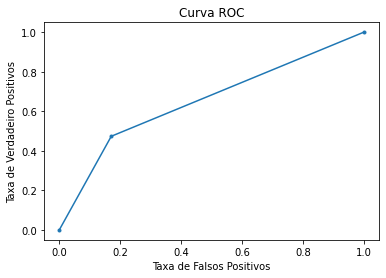

Área sobre a curva: 0.6514762516046213


In [106]:
fpr, tpr, _ = roc_curve(y_test,rede)
plt.plot(fpr,tpr,marker='.')
plt.title('Curva ROC')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
print(f"Área sobre a curva: {roc_auc_score(y_test,rede)}")

### Conclusão



---


A acurácia provavelmente está flutuando entre os 70%, mas, por conta das classes desbalanceadas, não é uma boa métrica de avaliação para um classificador. 

Outro ponto a ser observado é a diferença entre a precisão e o recall. Como o dataset possui mais instâncias da classe 0 do que da classe 1, o classificador será melhor em classificar classes do tipo 0, aumentando, portanto, a precisão. Porém, o classificador cometerá muitos falsos positivos, baixando a taxa de recall.


---



## **Validação Cruzada - Rede Neural**

In [107]:
# definindo modelo
rede = MLPClassifier(hidden_layer_sizes=(150),activation='logistic',max_iter=1500)

In [108]:
# calculando os scores
scores = cross_val_score(rede,X,y,cv=10)
scores

array([0.7       , 0.66666667, 0.66666667, 0.63333333, 0.8       ,
       0.6       , 0.73333333, 0.83333333, 0.8       , 0.75862069])

In [109]:
# calculando a média e o desvio padrão dos scores
scores.mean(), scores.std()

(0.7191954022988505, 0.0743688820119386)

### Conclusão



---

Provando o que foi dito anteriormente, a acurácia está realmente flutuando em torno dos 70%. 

---



## **Comparando MLP com Árvore de Decisão e Random Forest**

In [110]:
# criando árvore
arvore = DecisionTreeClassifier()

# calculando os scores com cross validati
scores_arvore = cross_val_score(arvore,X,y,cv=10)

In [116]:
#criando random forest
floresta = RandomForestClassifier(n_estimators=200)

#calculando os scores com cross validation
scores_floresta = cross_val_score(floresta,X,y,cv=10)

In [112]:
#criando rede neural
rede = MLPClassifier(hidden_layer_sizes=(100),activation='logistic',max_iter=1000)

#calculando os scores com cross validation
scores_rede = cross_val_score(rede,X,y,cv=10)

In [117]:
# printando scores
print('Rede Neural: ', scores_rede)
print('Arvore: ', scores_arvore)
print('Random Forest: ', scores_floresta)

Rede Neural:  [0.7        0.66666667 0.8        0.66666667 0.8        0.6
 0.73333333 0.83333333 0.8        0.75862069]
Arvore:  [0.56666667 0.66666667 0.76666667 0.73333333 0.73333333 0.7
 0.53333333 0.7        0.7        0.62068966]
Random Forest:  [0.8        0.7        0.76666667 0.63333333 0.7        0.83333333
 0.66666667 0.86666667 0.8        0.75862069]


In [118]:
print('Árvore de Decisão: ', round(scores_arvore.mean(),3),round(scores_arvore.std(),3))
print('Random Forest: ', round(scores.mean(),3),round(scores.std(),3))
print('Rede Neural:', round(scores_rede.mean(),3),round(scores_rede.std(),3))

Árvore de Decisão:  0.672 0.072
Random Forest:  0.719 0.074
Rede Neural: 0.736 0.072


### Conclusão



---


A Rede Neural (MLP), quando comparada aos outros classificadores, possui uma taxa de acertos maior. Porém, levando em conta o recall dado, não seria recomendado usar esse modelo em produção.


---




# **Com balanceamento**

## **Organizando dados para modelagem**



---


Para balancear os dados, eu usarei um método que segue a lógica do *OverSampling*, uma técnica que consiste em dublicar instâncias da classe minoritária.

Se os testes feitos tiverem um bom resultado, significa que o desbalanceamento das instâncias é o motivo das métricas de avaliação estarem baixas (principalemente a métrica recall).



---

### **Balanceando e organizando os dados**

In [65]:
# iniciando objeto para fazer OverSampling
ros = RandomOverSampler()

In [66]:
# iniciando X2
tam = len(dados.columns)
X2 = dados.iloc[:,0:(tam-1)]
X2.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
0,0.636364,0.0,0.071319,0.0,0.090909,1.0,0.290823,0.157303,0.485714,1.0,0.0
1,0.272727,0.0,1.000000,0.0,0.363636,0.0,0.288833,0.067416,0.657143,1.0,0.0
2,0.454545,0.0,0.015693,0.0,0.090909,0.0,0.165960,0.089888,0.457143,1.0,1.0
3,0.181818,1.0,0.011227,0.0,0.090909,0.0,0.224148,0.157303,0.685714,1.0,0.0
4,0.454545,1.0,0.017479,1.0,0.090909,0.0,0.365984,0.247191,0.085714,0.0,0.0


In [67]:
# iniciando y2
y2 = dados.DEATH_EVENT
y2

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
294    0.0
295    0.0
296    0.0
297    0.0
298    0.0
Name: DEATH_EVENT, Length: 299, dtype: float64

In [68]:
# dividndo em dados de treino e teste
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2)


--- 
**OBSERVAÇÃO**

Eu fiz OverSampling nos dados para treino, pois, se eu fizesse no dataframe inteiro ou mesmo Incluísse os dados de teste, eu geraria, cosnsequentemente, um classificador ilusório que não possui muita generalização. Isso acontece devido ao duplicamento de instâncias. Um exemplo: Se existirem duas instâncias iguais no dataset, resultado de duplicação por OverSampling, e uma for para os dados de treino e outra para o de teste, meu classificador pode simplesmente decorar a resposta na etapa de treino e usa-la na etapa de teste, aumentando, ilusoriamente, a taxa de acertos.


---



In [69]:
# fazendo OverSampling nos dados de treino
X2_train, y2_train = ros.fit_resample(X2_train, y2_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


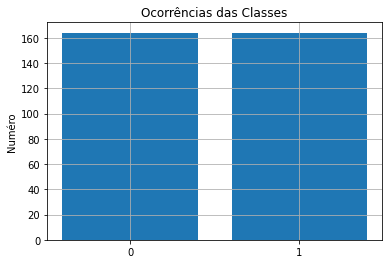

In [70]:
# gráfico de barras que mostra as classes de y3_train
# observe que elas tem, praticamente, a mesma quantidade de instâncias
plt.bar(['0', '1'], [list(y2_train).count(0), list(y2_train).count(1)])
plt.ylabel('Numéro')
plt.title('Ocorrências das Classes')
plt.grid(True)
plt.show()

## **Definindo algoritmo de aprendizado**

### **Rede Neural Multi-Layer Perceptron (MLP)**

In [71]:
# definindo modelo
rede2 = MLPClassifier(hidden_layer_sizes=(150),activation='logistic',max_iter=1500)

In [72]:
# treinando modelo
rede2.fit(X2_train,y2_train)

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
              beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=150, learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=1500,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=None, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [73]:
# realizando classificação
rede2 = rede2.predict(X2_test)
rede2

array([0., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
       1., 1., 0., 1., 0., 0., 0., 1., 0.])

### **Arvore de Decisão**

In [74]:
# definindo modelo
arvore2 = DecisionTreeClassifier()

In [75]:
# treinando modelo
arvore2.fit(X2_train,y2_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [76]:
# realizando classificação
arvore2 = arvore2.predict(X2_test)
arvore2

array([0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1.,
       0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0.])

### **Random Forest**

In [77]:
# criando random forest
floresta2 = RandomForestClassifier(n_estimators=200)

In [78]:
# treinando modelo
floresta2.fit(X2_train, y2_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [79]:
# realizando classificação
floresta2 = floresta2.predict(X2_test)
floresta2

array([1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0.,
       1., 1., 1., 0., 0., 1., 0., 1., 0.])

### **Comparando Classificadores com Balanceamento**

In [80]:
# calculando acurácia
print('Rede Neural: {}'.format(accuracy_score(y2_test, rede2)))
print('Arvore de decisão: {}'.format(accuracy_score(y2_test, arvore2)))
print('Random Forest: {}'.format(accuracy_score(y2_test, floresta2)))

Rede Neural: 0.75
Arvore de decisão: 0.6333333333333333
Random Forest: 0.7


In [81]:
# calculando precisão
print('Rede Neural: {}'.format(precision_score(y2_test, rede2)))
print('Arvore de decisão: {}'.format(precision_score(y2_test, arvore2)))
print('Random Forest: {}'.format(precision_score(y2_test, floresta2)))

Rede Neural: 0.6071428571428571
Arvore de decisão: 0.48
Random Forest: 0.56


In [82]:
# calculando recall_score
print('Rede Neural: {}'.format(recall_score(y2_test, rede2)))
print('Arvore de decisão: {}'.format(recall_score(y2_test, arvore2)))
print('Random Forest: {}'.format(recall_score(y2_test, floresta2)))

Rede Neural: 0.8095238095238095
Arvore de decisão: 0.5714285714285714
Random Forest: 0.6666666666666666


In [83]:
# calculando f1-score
print('Rede Neural: {}'.format(f1_score(y2_test, rede2)))
print('Arvore de decisão: {}'.format(f1_score(y2_test, arvore2)))
print('Random Forest: {}'.format(f1_score(y2_test, floresta2)))

Rede Neural: 0.6938775510204083
Arvore de decisão: 0.5217391304347826
Random Forest: 0.6086956521739131


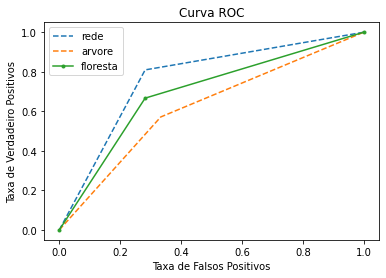

Área sobre a curva - Rede Neural: 0.7637362637362638
Área sobre a curva - Arvore: 0.6190476190476191
Área sobre a curva - Floresta: 0.6923076923076923


In [84]:
# Plotando gráfico da Curva ROC
fpr_re3, tpr_re3, _ = roc_curve(y2_test,rede2)
fpr_ar3, tpr_ar3, _ = roc_curve(y2_test,arvore2)
fpr_fl3, tpr_fl3, _ = roc_curve(y2_test,floresta2)
plt.plot(fpr_re3,tpr_re3,linestyle='--',label='rede')
plt.plot(fpr_ar3,tpr_ar3,linestyle='--',label='arvore')
plt.plot(fpr_fl3,tpr_fl3,marker='.',label='floresta')
plt.title('Curva ROC')
plt.legend()
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiro Positivos')
plt.show()
print(f"Área sobre a curva - Rede Neural: {roc_auc_score(y2_test,rede2)}")
print(f"Área sobre a curva - Arvore: {roc_auc_score(y2_test,arvore2)}")
print(f"Área sobre a curva - Floresta: {roc_auc_score(y2_test,floresta2)}")

### Conclusão



---
Após a comparação dos resultados das métricas de avaliação dos classificadores com os dados balanceados e desbalanceados, é possível concluir que a classificação com os dados balanceados resulta em um melhoramento númerico nas métricas de acurácia e recall, chegando até 80% no caso da Rede Neural (MLP). 

Portanto, a hipotese sobre a queda da taxa de acertos, causada pelos dados desbalanceados, é provavelmente verdadeira.

Com as análises feitas, é possível concluir que a Rede Neural (MLP), comparado a Random Forest e Arvore de Decisão, é o melhor classificador para ser usado na discriminação das classes do dataset usado aqui.

---


